In [188]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm import tqdm

In [189]:
##REG SHO LIST 

In [190]:
directory = "/Users/sean/RegShoListNASDAQ/"
regShoList = {}
for file in tqdm(os.scandir(directory)):
    if (file.is_file() and file.name[0:8] == "nasdaqth"):
        date = file.name[8:-4]
        date = date[:4] + "-" + date[4: 6] + "-" + date[6:]
        info = pd.read_csv(file.path, sep="|")
        if str(info['Symbol'][len(info['Symbol']) -1]).isnumeric():
            info['Symbol'].pop(len(info['Symbol']) -1)
        regShoList[date] = set(info['Symbol'])

1685it [00:08, 210.62it/s]


In [191]:
# reset to here
#dfs = pd.read_csv('/Users/sean/StockCategoryLists/MASTERFILE.csv')
#dfs = pd.read_pickle("/Users/sean/StockCategoryLists/MASTERFILEPickle.pkl")

In [476]:
###AV
dfs = pd.read_pickle("/Users/sean/StockCategoryLists/MASTERFILEPickleCompressed1.pkl")
# reset to here
dfs = dfs.rename(columns={'date': 'datetime', '1. open': 'open', '4. close': "close", '2. high': "high", '3. low': "low",'6. volume': "volume"})
dfs

,datetime,open,high,low,close,5. adjusted close,volume,8. split coefficient,symbol,pct_gain,SharesFloat,SharesOutstanding,MarketCap,5yearPerformance,1yearPerformance,1yearPerformanceNext,5yearPerformanceNext
1,2021-10-22,67.38,67.38,66.60,67.00,67.000000,867312.0,1.0,PNW,-0.005640,112460000,112786000,7.599521e+09,0.067206,-0.193323,NaN,NaN
2,2021-10-21,68.12,68.69,67.30,67.34,67.340000,987524.0,1.0,PNW,-0.011450,112460000,112786000,7.682982e+09,0.068447,-0.191286,NaN,NaN
3,2021-10-20,67.37,68.64,67.37,68.36,68.360000,1026053.0,1.0,PNW,0.014695,112460000,112786000,7.598393e+09,0.080570,-0.169460,NaN,NaN
4,2021-10-19,67.35,67.76,66.67,67.23,67.230000,1253256.0,1.0,PNW,-0.001782,112460000,112786000,7.596137e+09,0.044002,-0.163279,NaN,NaN
5,2021-10-18,67.67,67.71,66.00,67.01,67.010000,1607727.0,1.0,PNW,-0.009753,112460000,112786000,7.632229e+09,0.061928,-0.152240,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5304,2000-09-25,14.06,14.06,13.69,13.87,3.496297,2808895.0,1.0,UMC,-0.013514,2272814000,2463600000,1.374117e+11,NaN,NaN,-0.401713,-0.401713
5305,2000-09-22,13.75,14.12,13.44,14.06,3.544191,3349785.0,1.0,UMC,0.022545,2272814000,2463600000,1.343820e+11,NaN,NaN,-0.418205,-0.418205
5306,2000-09-21,14.87,15.19,14.56,14.87,3.748373,4809469.0,1.0,UMC,0.000000,2272814000,2463600000,1.453280e+11,NaN,NaN,-0.453076,-0.453076
5307,2000-09-20,14.00,15.00,13.75,14.87,3.748373,5745768.0,1.0,UMC,0.062143,2272814000,2463600000,1.368253e+11,NaN,NaN,-0.445127,-0.445127


In [477]:
#pd.to_pickle(dfs, "/Users/sean/StockCategoryLists/MASTERFILEPickle.pkl")
#print(len(dfs))

In [478]:
# dfs_0
dfs_0 = dfs.copy()



In [479]:
print(len(dfs_0))
dfs_0 = dfs_0.sort_values(['datetime'])

18108577


In [480]:
dfs_0

,datetime,open,high,low,close,5. adjusted close,volume,8. split coefficient,symbol,pct_gain,SharesFloat,SharesOutstanding,MarketCap,5yearPerformance,1yearPerformance,1yearPerformanceNext,5yearPerformanceNext
5531,1999-11-01,14.190,14.250,14.190,14.190,4.749370,19700.0,1.0,DTF,0.000000,-1,-1,-4.239638e+01,NaN,NaN,0.429838,0.429838
5531,1999-11-01,22.000,22.940,22.000,22.500,6.867531,55100.0,1.0,GABC,0.022727,24723100,26545700,1.913369e+09,NaN,NaN,-0.051936,-0.051936
5531,1999-11-01,36.500,36.690,36.250,36.630,14.046437,2137800.0,1.0,USB,0.003562,1479361000,1482620000,1.411216e+11,NaN,NaN,0.200877,0.200877
5531,1999-11-01,59.380,60.130,59.190,59.310,22.057740,281900.0,1.0,GSK,-0.001179,2446694000,2515860000,4.016924e+11,NaN,NaN,-0.184977,-0.184977
5531,1999-11-01,29.750,29.750,27.500,27.500,10.245649,30044.0,1.0,FWRD,-0.075630,26803600,27100400,2.163993e+09,NaN,NaN,1.383636,1.383636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2021-10-22,10.100,10.100,10.100,10.100,10.100000,328.0,1.0,BLTSU,0.000000,22645800,0,0.000000e+00,NaN,NaN,NaN,NaN
1,2021-10-22,0.558,0.558,0.526,0.526,0.526000,441.0,1.0,GAMCW,-0.057348,0,0,0.000000e+00,NaN,NaN,NaN,NaN
1,2021-10-22,2.450,2.484,2.420,2.420,2.420000,136355.0,1.0,STON,-0.012245,19056500,118012000,2.891294e+08,-0.722058,1.630435,NaN,NaN
1,2021-10-22,9.750,9.780,9.750,9.780,9.780000,38079.0,1.0,STRE,0.003077,0,28103400,2.740082e+08,NaN,NaN,NaN,NaN


In [481]:
#dfs_0 = dfs_0.drop(columns='7. dividend amount')
dfs_0["MarketCap"]

5531   -4.239638e+01
5531    1.913369e+09
5531    1.411216e+11
5531    4.016924e+11
5531    2.163993e+09
            ...     
1       0.000000e+00
1       0.000000e+00
1       2.891294e+08
1       2.740082e+08
1       7.599521e+09
Name: MarketCap, Length: 18108577, dtype: float64

In [482]:

dfs_0 = dfs_0[dfs_0['symbol'] != 'DVOL']
dfs_0 = dfs_0[dfs_0['open'] > 1]
dfs_0 = dfs_0[dfs_0['volume'] > 100]
dfs_0 = dfs_0[dfs_0["MarketCap"] > 2000000000]

In [483]:
dfs_0.dropna(inplace=True)
dfs_0 = dfs_0.reset_index(drop=True)
dfs_0 = dfs_0.sort_values(['symbol','datetime'])

#dfs_0 = dfs_0[dfs_0['pct_gain'] > .06]

In [484]:
print(len(dfs_0))

3064466


In [ ]:
def statsAnalysis(df):
    df_dict = df.to_dict('records')
    microFloatCount = 0
    smallFloatCount = 0 
    mediumPlusFloatCount = 0
    
    microCapCount = 0
    smallCapCount = 0 
    mediumCapCount = 0
    LargeCapCount = 0
    
    for row in df_dict:
        if row["MarketCap"] > 1*10**9:
            LargeCapCount +=1
        elif row["MarketCap"] > 1*10**8:
            mediumCapCount +=1   
        elif row["MarketCap"] > 1*10**7:
            smallCapCount +=1
        elif row["MarketCap"] < 1*10**7:
            microCapCount +=1   
            
        if row["SharesFloat"] > 2 * 10**7:
            mediumPlusFloatCount +=1
        elif row["SharesFloat"] > 2 * 10**6:
            smallFloatCount +=1
        elif row['SharesFloat'] < 2 * 10**6:
            microFloatCount +=1
        
    print("Micro Float: " + str(microFloatCount))
    print("Small Float: " + str(smallFloatCount))
    print("Medium+ Float: " + str(mediumPlusFloatCount))
    print("Micro Cap: " + str(microCapCount))
    print("Small Cap: " + str(smallCapCount))
    print("Medium Cap: " + str(mediumCapCount))
    print("Large Cap: " + str(LargeCapCount))
    
        

In [ ]:
##Specify MARKET CAP AND FLOAT 
param = 'allStocks'

if (param == 'SmallCapSmallFloat'):
    dfs_0 = dfs_0[dfs_0['MarketCap'] < 1200000000]
    dfs_0 = dfs_0[dfs_0['SharesFloat'] > 2000000]
    dfs_0 = dfs_0[dfs_0['MarketCap'] > 10000000]
    dfs_0 = dfs_0[dfs_0['SharesFloat'] < 12000000]
elif (param == 'AllStocks'):
    pass
elif (param == 'Medium+'):
    dfs_0 = dfs_0[dfs_0['SharesFloat'] >= 12000000]
    dfs_0 = dfs_0[dfs_0['MarketCap'] >= 150000000]
elif (param == 'multiDay'):
    dfs_0 = dfs_0[dfs_0['pct_gain'] > .05]
    dfs_0 = dfs_0[dfs_0['day1high_gain'] > .40]
    


In [ ]:
# dfs

In [9]:
highBins = [-1,-.000001,.01,.02,.03,.05,.1,.2,.3,.4,.5,.75,1.1,2.1,3.1,5,10,20]
dfs['high'].hist(bins=highBins, density= True, label=str)
dfs.groupby(pd.cut(dfs['high'], highBins)).count()


NameError: name 'dfs' is not defined

In [ ]:
dfs_small_list = []
for name, group in dfs_0.groupby(['datetime']):
    dfs_small_list.append(group.sort_values(by='pct_gain', ascending=False).head(10))
dfs_small = pd.concat(dfs_small_list).sort_values(['datetime','pct_gain'])
#dfs_small[dfs_small.pct_gain > 0] 

In [ ]:
dfs_small['pct_gain'].mean()


In [43]:
dfs14Up = dfs_0.copy()
dfs14Up = dfs14Up[dfs14Up['open'] > 14]

In [57]:
dfs_0[dfs_0['symbol'] == 'FLIR']

,datetime,volume,open,high,low,close,symbol,pct_gain,premarket_gain,SharesFloat,...,dayBeforeHigh11,dayBeforeHigh12,dayBeforeHigh13,dayBeforeHigh14,dayBeforeHigh15,dayBeforeHigh16,dayBeforeHigh17,dayBeforeHigh18,dayBeforeHigh19,monthHigh


In [45]:
print(len(dfs14Up))

4930042


In [36]:
dfs_small_list_pre = []
for name, group in dfs_0.groupby(['datetime']):
    dfs_small_list_pre.append(group.sort_values(by='premarket_gain', ascending=False).head(10))
dfs_small_pre = pd.concat(dfs_small_list_pre).sort_values(['datetime','premarket_gain'])


In [44]:
dfs_small_list_pre_14 = []
for name, group in dfs14Up.groupby(['datetime']):
    dfs_small_list_pre_14.append(group.sort_values(by='premarket_gain', ascending=False).head(10))
dfs_small_pre_14 = pd.concat(dfs_small_list_pre_14).sort_values(['datetime','premarket_gain'])

In [56]:
dfs_small_pre_14[dfs_small_pre_14['datetime'] ==pd.Timestamp(2021, 1, 4)]

,datetime,volume,open,high,low,close,symbol,pct_gain,premarket_gain,SharesFloat,...,dayBeforeHigh11,dayBeforeHigh12,dayBeforeHigh13,dayBeforeHigh14,dayBeforeHigh15,dayBeforeHigh16,dayBeforeHigh17,dayBeforeHigh18,dayBeforeHigh19,monthHigh
539815,2021-01-04,1589897.0,21.1600,21.95,19.45,21.74,ODT,0.027410,0.102083,11130200,...,15.15,15.6200,16.0000,18.5000,17.0300,16.6000,17.090,17.200,16.5250,19.8900
2030138,2021-01-04,32293631.0,18.8000,19.23,15.85,16.48,RIOT,-0.123404,0.106533,72072000,...,11.66,10.2999,9.8900,9.2700,9.5900,10.0901,10.920,11.290,10.5900,18.6689
5213249,2021-01-04,218979.0,28.1600,31.26,28.16,30.76,GDXU,0.092330,0.111287,-1,...,24.93,23.7400,23.7300,23.8899,24.7400,25.6700,27.690,26.820,24.5224,28.5000
3237782,2021-01-04,235844.0,42.8000,43.40,40.95,41.54,KORU,-0.029439,0.112555,-1,...,33.82,34.2500,33.6300,33.8300,34.1799,34.1300,32.370,34.685,34.1300,39.1000
3550613,2021-01-04,10815063.0,19.8000,21.98,18.01,21.18,LEV,0.069697,0.113611,116759000,...,14.87,15.4000,16.1000,16.2400,15.6871,16.5500,17.200,16.280,14.7400,20.0900
2964827,2021-01-04,4748614.0,92.7600,94.23,92.70,93.64,MGLN,0.009487,0.119749,21984500,...,81.81,81.6200,81.5000,80.9600,81.0900,81.0100,79.995,79.720,79.6400,83.3800
5295187,2021-01-04,8214887.0,16.9000,17.69,16.73,17.69,BPYU,0.046746,0.131191,-1,...,16.15,16.0400,16.2028,16.0500,15.9300,15.7950,15.950,16.400,16.3127,16.4000
3177901,2021-01-04,39131927.0,16.9400,17.14,16.76,17.01,BPY,0.004132,0.170698,301040000,...,15.90,15.8500,15.8400,15.6400,15.6200,15.4800,15.060,15.350,15.6200,15.9000
996095,2021-01-04,38672105.0,25.7000,33.00,25.50,29.27,BTBT,0.138911,0.172980,30603100,...,7.05,6.4900,6.4800,6.0000,6.1600,5.9900,6.270,6.690,7.3300,24.3100
4104512,2021-01-04,3271786.0,16.8185,17.10,15.72,16.42,CURI,-0.023694,0.205627,24948900,...,11.67,11.0000,9.7000,9.0100,8.9700,9.1304,9.270,9.240,9.3900,15.3000


In [33]:
dfs_small_list_pre_loss = []

for name, group in dfs_0.groupby(['datetime']):
    dfs_small_list_pre_loss.append(group.sort_values(by='premarket_gain', ascending=True).head(10))
dfs_small_list_pre_loss = pd.concat(dfs_small_list_pre_loss).sort_values(['datetime','premarket_gain'])


In [148]:
dfs.keys()

Index(['datetime', 'volume', 'open', 'high', 'low', 'close', 'symbol',
       'pct_gain', 'premarket_gain', 'SharesFloat', 'SharesOutstanding',
       'MarketCap', 'day1Date', '1monthPerformance', '3monthPerformance',
       '6monthPerformance', '1yearPerformance', 'pct_gain1', 'pct_gain2',
       'pct_gain3', 'pct_gain4', 'pct_gain5'],
      dtype='object')

In [485]:
dfs_small_list_Billion_gain = []

for name, group in dfs_0.groupby(['datetime']):
    dfs_small_list_Billion_gain.append(group.sort_values(by='5yearPerformance', ascending=False).head(10))
dfs_small_list_Billion_gain = pd.concat(dfs_small_list_Billion_gain).sort_values(['datetime','5yearPerformance'])


In [486]:
dfs_small_list_Billion_loss = []

for name, group in dfs_0.groupby(['datetime']):
    dfs_small_list_Billion_loss.append(group.sort_values(by='5yearPerformance', ascending=True).head(10))
dfs_small_list_Billion_loss = pd.concat(dfs_small_list_Billion_loss).sort_values(['datetime','5yearPerformance'])


In [124]:

dfs_small_list_pre_loss = dfs_small_list_pre_loss[dfs_small_list_pre_loss['premarket_gain'] > -.1]

groupsTotal = []
dailyGains = []
EquityTrail = 1
for name, group in dfs_small_list_pre_loss.groupby(['datetime']):
    mean= group['pct_gain'].mean()
    df_dict = group.to_dict('records')
    dailyGain = 0
    for row in df_dict:
        dailyGain+=  EquityTrail/5 * (0+row['pct_gain']) 
    dailyGains.append(dailyGain/EquityTrail)
    EquityTrail += dailyGain

    #print(mean)
    groupsTotal.append(mean)
print(sum(groupsTotal)/len(groupsTotal))
print()
print(sum(dailyGains)/len(dailyGains))
print()
print(EquityTrail)




0.011288907302323797

0.016543427507225768

1903112.8996148934


In [153]:
# dfs
dfs_small_list_pre_loss[dfs_small_list_pre_loss['open'] < 50]['pct_gain'].mean()

0.01571714397477902

In [13]:
# top20df = pd.concat(top20s)

In [25]:
# top20df[top20df.datetime == _D]

#dfs_small_list_pre_loss

In [15]:
_D = pd.Timestamp(2021, 1, 29)

In [ ]:
statsAnalysis(dfs_small)

,datetime,volume,open,high,low,close,symbol,pct_gain,premarket_gain,SharesFloat,...,day3low,OverNightGain3,pct_gain4,day4high_gain,day4low,OverNightGain4,pct_gain5,day5high_gain,day5low,OverNightGain5
pct_gain,,,,,,,,,,,,,,,,,,,,,
"(-1.0, -0.8]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(-0.8, -0.5]",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(-0.5, -0.4]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(-0.4, -0.3]",5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
"(-0.3, -0.2]",35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
"(-0.2, -0.1]",198,198,198,198,198,198,198,198,198,198,...,198,198,198,198,198,198,198,198,198,198
"(-0.1, -0.05]",513,513,513,513,513,513,513,513,513,513,...,513,513,513,513,513,513,513,513,513,513
"(-0.05, -0.01]",1123,1123,1123,1123,1123,1123,1123,1123,1123,1123,...,1123,1123,1123,1123,1123,1123,1123,1123,1123,1123
"(-0.01, 0.0]",884,884,884,884,884,884,884,884,884,884,...,884,884,884,884,884,884,884,884,884,884


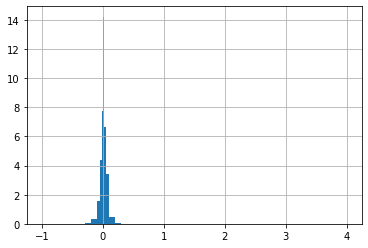

In [61]:
pctChangeBins = [-1,-.8,-.5,-.4,-.3,-.2,-.1,-.05,-.01,0,.01,.05,.1,.2,.3,.4,.5,.75,1.1,2.1,3.1,4]
dfs_small_list_pre_loss['pct_gain'].hist(bins=pctChangeBins, density= True)
dfs_small_list_pre_loss.groupby(pd.cut(dfs_small_list_pre_loss['pct_gain'], pctChangeBins)).count()

In [139]:
from datetime import datetime
import datetime
def runPercentages(pct_gainCol, df):
    Equity = 10000000
    yearEquity = 30000
    defaultYearEquity = 30000
    
    preMarketLosers = True
    Trades = 0
    TradesPerDay = 10
    day = 0
    dailyEquityGain = 0
    monthEquityGain = 0
    yearEquityGain = 0
    equityCurve = {}
    df_dict = df.to_dict('records')
    
    currentday = "2013-08-27"
    NumStopsHit = 0
    CurrentHigh = 1
    CurrentLow = 1
    MaxDrawDown = 0
    MonthEquity = {'01' : 30000, '02' : 30000, '03' : 30000, '04' : 30000, '05' : 30000, '06' : 30000,
                  '07' : 30000, '08' : 30000, '09' : 30000, '10' : 30000, '11' : 30000, '12' : 30000,}

    DefaultEquity = MonthEquity
    MonthEquityGain = 0
    yearTrades = [0, 0, 0, 0 ,0 ,0 ,0, 0, 0, 0, 0, 0, 0,0,0,0,0,0]
    startingYear = 2008
    currentyear = 2013
    LEVERAGE = 1
    
    tradeType = {"GainGain": 0, "GainLossSpike": 0, "LargeGainGain":0, "LargeGainLossSpike": 0}
    tradesDays = []
    wins = 0
    dayWins = 0
    for row in df_dict:
        dayOfMonth = str(currentday)[8:10]
        month = str(currentday)[5:7]
        year = str(currentday)[0:4]
        date = year + "-" + month + "-" + dayOfMonth 
        if year != currentyear:
            #print(str(currentyear) + " : " + str(MonthEquity))
            print(str(year) + " : " + str(Equity))
            MonthEquity = DefaultEquity
            yearEquity = defaultYearEquity
            #print()
            
        if (row['datetime'] != currentday ):
            #print(month)
            
            #df_of_day = df[df['datetime']] == row['datetime']
            day +=1
            #print("Equity: " + str(Equity) + "  daily gain: " + str(dailyEquityGain))
            tradesDays.append(dailyEquityGain/Equity)
            if dailyEquityGain > 0:
                dayWins+=1
            Equity+= dailyEquityGain
            
            MonthEquity[month] += monthEquityGain
            
            yearEquity += yearEquityGain
      
            
            dailyEquityGain = 0
            MonthEquityGain = 0
            
            equityCurve[day] = [day, Equity]
            if (Equity > CurrentHigh):
                CurrentHigh = Equity
                CurrentLow = Equity
            if (Equity < CurrentLow):
                CurrentLow = Equity
                DrawDown = (CurrentHigh - CurrentLow) / CurrentHigh
                if (MaxDrawDown < DrawDown):
                    MaxDrawDown = DrawDown
        if  True:
            percent = row[pct_gainCol]
            volumePrice = row['volume'] * row['open']
            
            tradeSize = Equity * (LEVERAGE / TradesPerDay)
            tradeSizeM = MonthEquity[month] * (LEVERAGE / TradesPerDay)
            tradeSizeY = yearEquity * (LEVERAGE / TradesPerDay) 
            if (volumePrice * .01 < tradeSize):
                tradeSize = volumePrice * .01

            yearTrades[int(year)-startingYear] += 1
            #print(row['datetime'])
            
            dayHigh = (row['high'] - row['open'])/ row['open']
            Stop = .1
            if (dayHigh > Stop):
                percent = Stop
                #print("yay")
                NumStopsHit +=1
            if (row['OverNightGain1'] < -1000):
                dailyEquityGain += (0 - percent) * tradeSize - (tradeSize * .01)
                monthEquityGain += (0 - percent) * tradeSizeM - (tradeSizeM * .01)
                yearEquityGain += (0 - percent) * tradeSizeY - (tradeSizeY * .01)
                Trades +=1
                print("ERROR")
            elif (row['day1high_gain'] > 10000):
                percent -= .098
                dailyEquityGain += (0 - percent) * tradeSize - (tradeSize * .01)
                monthEquityGain += (0 - percent) * tradeSizeM - (tradeSizeM * .01)
                yearEquityGain += (0 - percent) * tradeSizeY - (tradeSizeY * .01)
                Trades +=1
                print("ERROR")
           
            if percent > 0:
                wins+=1
            dailyEquityGain += (0 + percent) * tradeSize - (tradeSize * .000)
            print(str(row['symbol']) + " " + str(row['datetime']) + " percent "  + str(percent))

            Trades +=1
                

        currentday = row['datetime']
        currentyear = year
        
    print('Final Equity---------')
    print(Equity)
    print("Trades: " + str(Trades))
    print(MaxDrawDown)
    print(MonthEquity)
    print(yearTrades)
    print(wins/Trades)
    print("num stops hit: " +  str(NumStopsHit))
    print(sum(tradesDays)/len(tradesDays))
    print(dayWins/len(tradesDays))
    
    return equityCurve

In [351]:
data = pd.DataFrame.from_dict(runPercentages('pct_gain', dfs_small_list_pre_loss), orient='index', columns=['day', 'equity'])
print(data)
data[data.day < 1000].plot(x='day', y='equity', figsize=(24,4))

NameError: name 'runPercentages' is not defined

In [ ]:
from datetime import datetime
import datetime
def runPercentagesTEST(pct_gainCol, df):
    Equity = 30000
    Trades = 0
    TradesPerDay = 10
    day = 0
    dailyEquityGain = 0
    equityCurve = {}
    df_dict = df.to_dict('records')
    
    currentday = "2016-08-27"
    
    CurrentHigh = 1
    CurrentLow = 1
    MaxDrawDown = 0
    MonthEquity = {'01' : 1, '02' : 1, '03' : 1, '04' : 1, '05' : 1, '06' : 1,
                  '07' : 1, '08' : 1, '09' : 1, '10' : 1, '11' : 1, '12' : 1,}
   
    MonthEquityGain = 0
    yearTrades = [0, 0, 0, 0 ,0 ,0 ,0, 0, 0, 0, 0, 0, 0,0,0,0,0,0]
    startingYear = 2008
    
    LEVERAGE = 2.0
    
    tradeType = {"GainGain": 0, "GainLossSpike": 0, "LargeGainGain":0, "LargeGainLossSpike": 0}
    
    
    for row in df_dict:
        if type(row['symbol']) == bool:
            continue
        if len(row['symbol']) > 4:
            continue
        dayOfMonth = str(currentday)[8:10]
        month = str(currentday)[5:7]
        year = str(currentday)[0:4]
        date = year + "-" + month + "-" + dayOfMonth 
        if (int(month) < 8 and int(year) == 2021 ):
            percent = row[pct_gainCol]
            volumePrice = row['volume'] * row['open']
            if (row['MarketCap'] <= 2*10**9):
                tradeSize = Equity * (LEVERAGE / TradesPerDay)
                if (volumePrice * .02 < tradeSize):
                    tradeSize = volumePrice * .02
            
                yearTrades[int(year)-startingYear] += 1
                #print(row['datetime']
                

                ###set up variable for next day 
                highPct = ((row['high'] - row['close'])/ row['high'])
                openP = row['close'] * (1 + row['OverNightGain1'])
                closeP = openP*(1+row['pct_gain1'])
                #print(str(row['symbol']) + " " + str(row['datetime']) + " high day 1 "  + str(openP*row['pct_gain1']))
                #print(str((1+ row['day1high_gain'])*openP) + " vs " + str(.99 * row['high']) )
                highDay1 = (1+row['day1high_gain']) * openP 
                Entry =  .987 * row['high']
                Entry = row['close']
                                
                 ##make trade if the open of day is less than .95 of open of day AND The Entry point is reached               
                if (row['high'] > openP *.95 and highDay1 > Entry):
                    percent = (closeP - Entry)/Entry
                    #if (highDay1  > 1.5 * row['high']):
                     #   percent = 1.5 - .987
                    dailyEquityGain += (0 - percent) *tradeSize - (tradeSize* .01) 
                    print(str(row['symbol']) + " " + str(row['datetime']) + " percent "  + str(percent))
                    Trades +=1
                 
                

                    
        if (row['datetime'] != currentday ):
            #print(month)
            
            #df_of_day = df[df['datetime']] == row['datetime']
            day +=1
            #print("Equity: " + str(Equity) + "  daily gain: " + str(dailyEquityGain))
            Equity+= dailyEquityGain
            MonthEquity[month] += MonthEquityGain
            dailyEquityGain = 0
            MonthEquityGain = 0
            
            equityCurve[day] = [day, Equity]
            if (Equity > CurrentHigh):
                CurrentHigh = Equity
                CurrentLow = Equity
            if (Equity < CurrentLow):
                CurrentLow = Equity
                DrawDown = (CurrentHigh - CurrentLow) / CurrentHigh
                if (MaxDrawDown < DrawDown):
                    MaxDrawDown = DrawDown
        currentday = row['datetime']
        
    print('Final Equity---------')
    print(Equity)
    print("Trades: " + str(Trades))
    print(MaxDrawDown)
    print(MonthEquity)
    print(yearTrades)
    
    return equityCurve

In [ ]:
data = pd.DataFrame.from_dict(runPercentagesTEST('pct_gain1',dfs_small_pre), orient='index', columns=['day', 'equity'])
print(data)
data[data.day < 3000].plot(x='day', y='equity', figsize=(24,4))

In [ ]:
dfs_small_pre[dfs_small_pre['symbol']=='True']

In [ ]:
from datetime import datetime
import datetime
def runPercentagesTestPre(pct_gainCol, df):
    Equity = 30000
    Trades = 0
    TradesPerDay = 10
    day = 0
    dailyEquityGain = 0
    equityCurve = {}
    df_dict = df.to_dict('records')
    
    currentday = "2016-08-27"
    
    CurrentHigh = 1
    CurrentLow = 1
    MaxDrawDown = 0
    MonthEquity = {'01' : 1, '02' : 1, '03' : 1, '04' : 1, '05' : 1, '06' : 1,
                  '07' : 1, '08' : 1, '09' : 1, '10' : 1, '11' : 1, '12' : 1,}
   
    MonthEquityGain = 0
    yearTrades = [0, 0, 0, 0 ,0 ,0 ,0, 0, 0, 0, 0, 0, 0,0,0,0,0,0]
    startingYear = 2008
    
    LEVERAGE = 2.0
    
    tradeType = {"GainGain": 0, "GainLossSpike": 0, "LargeGainGain":0, "LargeGainLossSpike": 0}
    wins = 0
    for row in df_dict:
        #print(row['symbol'])
        dayOfMonth = str(currentday)[8:10]
        month = str(currentday)[5:7]
        year = str(currentday)[0:4]
        date = year + "-" + month + "-" + dayOfMonth 
        if (int(month) < 8 ):
            percent = row[pct_gainCol]
            volumePrice = row['volume'] * row['open']
            
            if (row['MarketCap'] <= 2*10**9):
                tradeSize = Equity * (LEVERAGE / TradesPerDay)
                if (volumePrice * .005 < tradeSize):
                    tradeSize = volumePrice * .005 
                
                yearTrades[int(year)-startingYear] += 1
                #print(row['datetime'])
                if (row['high'] - row['open'])/row['open']> .95:
                    percent = .95
                if (row['low'] - row['open'])/row['open']< -.2:
                    percent = -.2
                if percent> 0: wins +=1
                dailyEquityGain += (0 - percent) * tradeSize - (tradeSize * 0.001) 
                print(str(row['symbol']) + " " + str(row['datetime']) + " percent "  + str(percent))
                Trades +=1
                
            elif (row['MarketCap'] <= 2*10**9):
                tradeSize = Equity * (LEVERAGE / TradesPerDay)/2
                if (volumePrice * .005 < tradeSize):
                    tradeSize = volumePrice * .005 
                
                yearTrades[int(year)-startingYear] += 1
                #print(row['datetime'])
                if percent< 0: wins +=1
                dailyEquityGain += (0 - percent) * tradeSize - (tradeSize * 0.01) 
                #print(str(row['symbol']) + " " + str(row['datetime']) + " percent "  + str(percent))
                Trades +=1
                    
        if (row['datetime'] != currentday ):
            #print(month)
            
            #df_of_day = df[df['datetime']] == row['datetime']
            day +=1
            #print("Equity: " + str(Equity) + "  daily gain: " + str(dailyEquityGain) + " " + str(day))
            Equity+= dailyEquityGain
            MonthEquity[month] += MonthEquityGain
            dailyEquityGain = 0
            MonthEquityGain = 0
            
            equityCurve[day] = [day, Equity]
            if (Equity > CurrentHigh):
                CurrentHigh = Equity
                CurrentLow = Equity
            if (Equity < CurrentLow):
                CurrentLow = Equity
                DrawDown = (CurrentHigh - CurrentLow) / CurrentHigh
                if (MaxDrawDown < DrawDown):
                    MaxDrawDown = DrawDown
        currentday = row['datetime']
        
    print('Final Equity---------')
    print(Equity)
    print("Trades: " + str(Trades))
    print(MaxDrawDown)
    print("Win percentage: " + str(wins/Trades))
    print(MonthEquity)
    print(yearTrades)
    
    return equityCurve

In [ ]:
data = pd.DataFrame.from_dict(runPercentagesTestPre('pct_gain',dfs_small_pre), orient='index', columns=['day', 'equity'])
print(data)
data[data.day < 250].plot(x='day', y='equity', figsize=(24,4))

In [ ]:
dfs_small_pre.plot(x='datetime', y='pct_gain', figsize=(24,4))

In [130]:
dfsRied = dfs_0.copy()
dfsRied = dfsRied[dfsRied['open'] < 50]
dfsRied = dfsRied[dfsRied['monthPerformance'] > 1]
dfsRied = dfsRied[dfsRied['premarket_gain'] >= -1]
dfsRied = dfsRied.sort_values(['datetime'])

###buy open close 

In [131]:
dfsRied['pct_gain'].mean()

-0.013013727093643932

In [132]:
dfsRied[['monthHigh', 'symbol','datetime']]

,monthHigh,symbol,datetime
4066781,7.2000,IO,2017-08-28
1077284,7.3000,CLAR,2017-08-28
1750240,3.6000,CDNA,2017-08-28
1077285,7.5500,CLAR,2017-08-29
4066782,7.3000,IO,2017-08-29
...,...,...,...
2384578,4.6000,MITT,2021-07-23
1433110,29.0000,SGOC,2021-07-23
2783035,26.2100,CLSC,2021-07-23
4037653,7.2017,NRXPW,2021-07-23


In [133]:
dfsRied.keys()

Index(['datetime', 'volume', 'open', 'high', 'low', 'close', 'symbol',
       'pct_gain', 'premarket_gain', 'SharesFloat', 'SharesOutstanding',
       'MarketCap', 'day1Date', 'lastMonthHigh', 'monthPerformance',
       'monthOpen', 'monthClose', 'pct_gain1', 'day1high_gain', 'day1Low',
       'day1Close', 'day1Open', 'OverNightGain1', 'pct_gain2', 'day2high_gain',
       'day2Low', 'day2Close', 'day2Open', 'OverNightGain2', 'pct_gain3',
       'day3high_gain', 'day3Low', 'day3Close', 'day3Open', 'OverNightGain3',
       'pct_gain4', 'day4high_gain', 'day4Low', 'day4Close', 'day4Open',
       'OverNightGain4', 'pct_gain5', 'day5high_gain', 'day5Low', 'day5Close',
       'day5Open', 'OverNightGain5', 'dayBeforeHigh1', 'dayBeforeHigh2',
       'dayBeforeHigh3', 'dayBeforeHigh4', 'dayBeforeHigh5', 'dayBeforeHigh6',
       'dayBeforeHigh7', 'dayBeforeHigh8', 'dayBeforeHigh9', 'dayBeforeHigh10',
       'dayBeforeHigh11', 'dayBeforeHigh12', 'dayBeforeHigh13',
       'dayBeforeHigh14', 'dayBe

In [136]:
from datetime import datetime
import datetime
def runPercentagesTestRiedGainers(pct_gainCol, df, df2):
    Equity = 30000
    Trades = 0
    TradesPerDay = 10
    day = 0
    dailyEquityGain = 0
    equityCurve = {}
    df_dict = df.to_dict('records')
    
    currentday = "2016-08-27"
    
    CurrentHigh = 1
    CurrentLow = 1
    MaxDrawDown = 0
    MonthEquity = {'01' : 1, '02' : 1, '03' : 1, '04' : 1, '05' : 1, '06' : 1,
                  '07' : 1, '08' : 1, '09' : 1, '10' : 1, '11' : 1, '12' : 1,}
   
    MonthEquityGain = 0
    yearTrades = [0, 0, 0, 0 ,0 ,0 ,0, 0, 0, 0, 0, 0, 0,0,0,0,0,0]
    startingYear = 2008
    
    LEVERAGE = 1
    
    tradeType = {"GainGain": 0, "GainLossSpike": 0, "LargeGainGain":0, "LargeGainLossSpike": 0}
    wins = 0
    TradePcts = []
    pctPCTS = []
    for row in df_dict:
        
        monthHigh = row['monthHigh']       
            
        #print(row['symbol'])
        dayOfMonth = str(currentday)[8:10]
        month = str(currentday)[5:7]
        year = str(currentday)[0:4]
        date = year + "-" + month + "-" + dayOfMonth 

        
        if (row['datetime'] != currentday ):
            
            #print(month)
            
            #df_of_day = df[df['datetime']] == row['datetime']
            day +=1
            #print("Equity: " + str(Equity) + "  daily gain: " + str(dailyEquityGain) + " " + str(day))
            Equity+= dailyEquityGain
            MonthEquity[month] += MonthEquityGain
            dailyEquityGain = 0
            MonthEquityGain = 0
            
            equityCurve[day] = [day, Equity]
            if (Equity > CurrentHigh):
                CurrentHigh = Equity
                CurrentLow = Equity
            if (Equity < CurrentLow):
                CurrentLow = Equity
                DrawDown = (CurrentHigh - CurrentLow) / CurrentHigh
                if (MaxDrawDown < DrawDown):
                    MaxDrawDown = DrawDown
        
        
        
        #print(year) a nd (monthHigh * .8 < row['open'] and monthHigh * 1.2 > row['open'] )
        if True :
            nextDayPrice = row['day1Close']
            percent = (row['day1Close']- row['open'])/ row['open']
            TradePcts.append(percent)
            
            volumePrice = row['volume'] * row['open']
            tradeSize = Equity * (LEVERAGE / TradesPerDay)
            if (volumePrice * .01 < tradeSize):
                tradeSize = volumePrice * .01 
            
            volumePrice = row['volume'] * row['open']
            if percent < 0: 
                wins+=1
            dailyEquityGain += (0 - percent) * tradeSize - (tradeSize * 0.000) 
            print("nextDayprice" + str(nextDayPrice))
            print("percent:" + str(percent))
            print("high:" + str(monthHigh))
            print(str(row['symbol']) + " " + str(row['datetime']) + " percent "  + str(percent) + " gap: " + str(row['premarket_gain']))
               
            Trades +=1

        currentday = row['datetime']
        
    print('Final Equity---------')
    print(Equity)
    print("Trades: " + str(Trades))
    print(MaxDrawDown)
    print("Win percentage: " + str(wins/Trades))
    print(MonthEquity)
    print(yearTrades)
    print(sum(TradePcts)/len(TradePcts))
    
    return equityCurve

In [352]:
data = pd.DataFrame.from_dict(runPercentagesTestRiedGainers('pct_gain', dfsRied, dfs_0), orient='index', columns=['day', 'equity'])
print(data)
data[data.day < 400].plot(x='day', y='equity', figsize=(24,4))

MAKING TRADE


KeyError: '1yearPerformance'

In [487]:
df_heeman = pd.concat([dfs_small_list_Billion_gain, dfs_small_list_Billion_loss])
df_heeman = df_heeman.sort_values(['datetime'])
#df_heeman.to_csv("HEEMAN.csv")
#df_heeman[df_heeman['datetime']== pd.Timestamp(2020, 7, 1)].sort_values(['1yearPerformance'])

In [488]:
#df_heeman[df_heeman['symbol']== 'AMC'] 

In [496]:
df_heeman

,datetime,open,high,low,close,5. adjusted close,volume,8. split coefficient,symbol,pct_gain,SharesFloat,SharesOutstanding,MarketCap,5yearPerformance,1yearPerformance,1yearPerformanceNext,5yearPerformanceNext
364,2004-10-22,23.68,23.68,22.01,22.16,7.893911,139500.0,1.0,RAVN,-0.064189,33221600,35917600,2.387627e+09,8.972367,0.847976,0.405814,0.405814
536,2004-10-22,9.73,10.07,9.51,9.62,8.556857,3166900.0,1.0,GT,-0.011305,280211000,281193000,3.075942e+09,-0.718734,0.529412,0.791060,0.791060
376,2004-10-22,7.98,8.24,7.93,7.95,7.950000,614200.0,1.0,BLDP,-0.003759,240847000,297606000,2.374896e+09,-0.712269,-0.400000,-0.671698,-0.671698
338,2004-10-22,9.06,9.10,8.98,9.07,5.649737,967900.0,1.0,CMS,0.001104,287951000,289654000,4.212955e+09,-0.704212,0.156888,0.592288,0.592288
393,2004-10-22,13.49,13.50,13.48,13.50,1.348966,1100.0,1.0,EBIX,0.000741,23630000,30943400,4.177465e+09,-0.754367,1.432432,11.957791,11.957791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063611,2016-11-03,164.13,164.13,159.65,160.07,149.475739,1781748.0,1.0,STZ,-0.024736,162834000,168251000,2.957228e+10,6.986448,0.220402,0.467797,0.467797
3063933,2016-11-03,45.00,45.45,44.45,44.45,42.829199,452468.0,1.0,HA,-0.012222,50135000,51208000,2.391565e+09,6.508446,0.167586,-0.530694,-0.530694
3063858,2016-11-03,37.50,37.70,35.33,37.16,37.160000,3062381.0,1.0,SRPT,-0.009067,76070000,79845000,2.994188e+09,6.118774,0.493569,1.159311,1.159311
3064030,2016-11-03,22.69,23.28,21.98,22.05,4.410000,133249.0,1.0,GOL,-0.028206,147105000,197481000,2.240422e+10,-0.728994,1.545601,0.387755,0.387755


In [499]:
from datetime import datetime
import datetime
def runPercentagesHeeman(pct_gainCol, df):
    Equity = 30000
    Trades = 0
    TradesPerDay = 50
    day = 0
    dailyEquityGain = 0
    equityCurve = {}
    df_dict = df.to_dict('records')
    
    currentday = "2016-08-27"
    
    CurrentHigh = 1
    CurrentLow = 1
    MaxDrawDown = 0
    MonthEquity = {'01' : 1, '02' : 1, '03' : 1, '04' : 1, '05' : 1, '06' : 1,
                  '07' : 1, '08' : 1, '09' : 1, '10' : 1, '11' : 1, '12' : 1,}
   
    MonthEquityGain = 0
    yearTrades = [0, 0, 0, 0 ,0 ,0 ,0, 0, 0, 0, 0, 0, 0,0,0,0,0,0]
    startingYear = 2008
    
    LEVERAGE = 1
    
    tradeType = {"GainGain": 0, "GainLossSpike": 0, "LargeGainGain":0, "LargeGainLossSpike": 0}
    wins = 0
    TradePcts = []
    pctPCTS = []
    currentYear = '2011'
    daysPassed = 0
    TradeForTimePeriod = False
    for row in df_dict:

           
            
        #print(row['symbol'])
        dayOfMonth = str(currentday)[8:10]
        month = str(currentday)[5:7]
        year = str(currentday)[0:4]
        date = year + "-" + month + "-" + dayOfMonth 
        if daysPassed > 60:
            TradeForTimePeriod = False
            daysPassed = 0

        if (row['datetime'] != currentday ):
            if dailyEquityGain != 0: 
                TradeForTimePeriod = True
                
            #print(month)
            daysPassed +=1
            
            day +=1
            Equity+= dailyEquityGain
            
            dailyEquityGain = 0

            
            equityCurve[day] = [day, Equity]
            if (Equity > CurrentHigh):
                CurrentHigh = Equity
                CurrentLow = Equity
            if (Equity < CurrentLow):
                CurrentLow = Equity
                DrawDown = (CurrentHigh - CurrentLow) / CurrentHigh
                if (MaxDrawDown < DrawDown):
                    MaxDrawDown = DrawDown
        
        
        
        #print(year) and (monthHigh * .8 < row['open'] and monthHigh * 1.2 > row['open'] )
        if not TradeForTimePeriod  :
            
            
            percent = row['1yearPerformanceNext']
            
            volumePrice = row['volume'] * row['open']
            tradeSize = Equity * (LEVERAGE / TradesPerDay)
            if (volumePrice * .01 < tradeSize):
                tradeSize = volumePrice * .01 
            
            volumePrice = row['volume'] * row['open']
            if percent > 0: 
                wins+=1
            if row['5yearPerformance'] > 0:
                dailyEquityGain += (0 + percent) * tradeSize - (tradeSize * 0.000) 
                TradePcts.append(percent)
                pass
            else:
                dailyEquityGain += (0 + percent) * tradeSize - (tradeSize * 0.000) 
                TradePcts.append(percent*-1)
                pass
                
            #print("percent:" + str(percent))
            print(dailyEquityGain)
            print( row['symbol'] + " " + str(row['datetime']) + " percent "  + str(row['1yearPerformanceNext']) + " 1yearP: " + str(row['5yearPerformance']))
               
            Trades +=1
            

        currentday = row['datetime']
        currentYear = year
        
    print('Final Equity---------')
    print(Equity)
    print("Trades: " + str(Trades))
    print(MaxDrawDown)
    print("Win percentage: " + str(wins/Trades))
    print(MonthEquity)
    print(yearTrades)
    print("AVERAGE TRADE____")
    print(sum(TradePcts)/len(TradePcts))
    
    return equityCurve

243.48869313361806
RAVN 2004-10-22 00:00:00 percent 0.4058144885560301 1yearP: 8.972367154516503
718.1248677726563
GT 2004-10-22 00:00:00 percent 0.7910602910650638 1yearP: -0.7187336591644641
315.1059998481281
BLDP 2004-10-22 00:00:00 percent -0.6716981132075471 1yearP: -0.7122692725298588
670.4787511508707
CMS 2004-10-22 00:00:00 percent 0.5922879188379043 1yearP: -0.7042124715614354
2444.895318403088
EBIX 2004-10-22 00:00:00 percent 11.957790735576635 1yearP: -0.7543668122267303
3340.909811156711
FFIV 2004-10-22 00:00:00 percent 1.4933574879227054 1yearP: -0.782961992136304
2824.5722152487024
SIRI 2004-10-22 00:00:00 percent -0.8605626598466806 1yearP: -0.842020202020067
2491.476129838703
SIFY 2004-10-22 00:00:00 percent -0.5551601423499994 1yearP: -0.8537509980034819
2703.876129838703
AKAM 2004-10-22 00:00:00 percent 0.3539999999999999 1yearP: -0.9139414802065404
2578.3525049720374
ERIC 2004-10-22 00:00:00 percent -0.209206041444443 1yearP: -0.7208156396891625
2564.962791630551
AEG

MU 2008-09-08 00:00:00 percent 2.1247165532963543 1yearP: -0.6964900206461933
248267.574877188
BHC 2008-09-08 00:00:00 percent 10.042476897712099 1yearP: -0.6505207247340562
258637.46586551747
ILMN 2008-09-08 00:00:00 percent 0.9078726968174206 1yearP: 14.889733840304181
257622.57048431758
BSX 2008-09-08 00:00:00 percent -0.08885298869143791 1yearP: -0.6380646104370705
256991.2709030674
SIFY 2008-09-08 00:00:00 percent -0.30468750000008904 1yearP: -0.6373937677045272
976.6217994139278
CVA 2008-12-03 00:00:00 percent 0.05896758328492265 1yearP: 5.735593220324748
74643.83536725743
HIG 2008-12-03 00:00:00 percent 4.447962920791675 1yearP: -0.8620287949693403
91762.30183752964
BGCP 2008-12-03 00:00:00 percent 1.5473312896491451 1yearP: -0.8424587930412376
120446.87579917829
FITB 2008-12-03 00:00:00 percent 1.7319498756745841 1yearP: -0.8311984421039672
260350.09956166288
MU 2008-12-03 00:00:00 percent 8.447236180877972 1yearP: -0.8294772922024375
321264.8451949859
LEN 2008-12-03 00:00:00 p

22844691.11982635
CX 2011-10-28 00:00:00 percent 1.69698728869972 1yearP: -0.8112672790310945
22807561.039979022
CLH 2011-10-28 00:00:00 percent -0.1852879944482998 1yearP: 4.511825786369774
-101589.66465012176
AG 2012-01-27 00:00:00 percent -0.5354870288796122 1yearP: 4.007352941181015
2107578.409434326
AIG 2012-01-27 00:00:00 percent 1.7484243546784415 1yearP: -0.9773694427491741
12647945.957545107
AAL 2012-01-27 00:00:00 percent 4.859303048064332 1yearP: -0.8610733695651207
18628314.441017494
BAC 2012-01-27 00:00:00 percent 2.15569875586426 1yearP: -0.8337687376737559
36701173.925454766
NFLX 2012-01-27 00:00:00 percent 6.514588660076987 1yearP: 4.3519239083441414
38462870.91748493
RF 2012-01-27 00:00:00 percent 1.8194427385837504 1yearP: -0.8316993982294205
40514826.16710299
MGM 2012-01-27 00:00:00 percent 1.1728582259314317 1yearP: -0.8099423631127722
40523264.27129588
NMR 2012-01-27 00:00:00 percent 0.8887891214996362 1yearP: -0.8043740438551464
40538344.9090994
LYG 2012-01-27 00:

-423702.8153297002
BB 2015-03-25 00:00:00 percent -0.6012931034482758 1yearP: -0.8671058284404983
-750707.8626678358
REGN 2015-03-25 00:00:00 percent -0.04867948633229812 1yearP: 16.255416191562144
-784476.2743696367
GGB 2015-03-25 00:00:00 percent -0.3156013341803442 1yearP: -0.7842977421118572
-753424.9855308577
EBR 2015-03-25 00:00:00 percent 1.5784101745870833 1yearP: -0.8389243089514228
-589761.5311162702
KGC 2015-03-25 00:00:00 percent 0.6544715447152607 1yearP: -0.8607464222344815
-4841857.987501972
BHC 2015-03-25 00:00:00 percent -0.9176691538500584 1yearP: 11.334851931133342
-4780591.93187417
NXST 2015-03-25 00:00:00 percent 0.33180409417936096 1yearP: 9.765946076753538
-4780227.343590577
LAD 2015-03-25 00:00:00 percent 0.0011536142420656872 1yearP: 13.09446760081581
-6168054.091204047
RIG 2015-03-25 00:00:00 percent -0.9103501021450527 1yearP: -0.7810011050288126
-6978843.829115659
JAZZ 2015-03-25 00:00:00 percent -0.39601386481802425 1yearP: 13.935289042277825
-8131300.83110

<AxesSubplot:xlabel='day'>

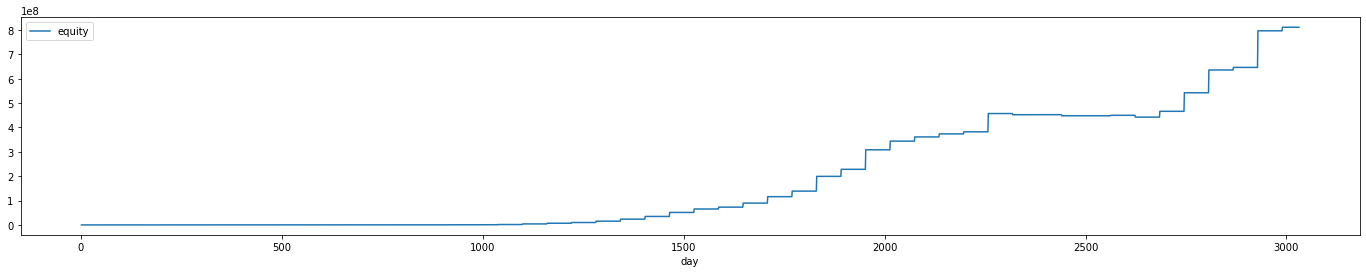

In [500]:
data = pd.DataFrame.from_dict(runPercentagesHeeman('3monthPerformance', df_heeman), orient='index', columns=['day', 'equity'])
print(data)
data[data.day < 25000].plot(x='day', y='equity', figsize=(24,4))